In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
game_df = pd.read_csv('game.csv')
game_info_df = pd.read_csv('game_info.csv')
team_df = pd.read_csv('team.csv')
team_details_df = pd.read_csv('team_details.csv')

In [3]:
team_details_df.drop(['headcoach', 'twitter', 'instagram', 'facebook', 'yearfounded'], axis=1, inplace=True)

In [4]:
merged_df = pd.merge(game_df, game_info_df, on='game_id')
# Group the dataframe by 'team_id'
grouped = merged_df.groupby(['team_id_home'])
merged_df['game_date_x'] = pd.to_datetime(merged_df['game_date_x'])

# Calculate the time differences in days for the 'game_date_x' column
time_diff = grouped['game_date_x'].diff().dt.days
merged_df['days_off_home'] = time_diff.fillna(0)

# Group the dataframe by 'team_id'
grouped = merged_df.groupby(['team_id_away'])
merged_df['game_date_x'] = pd.to_datetime(merged_df['game_date_x'])

# Calculate the time differences in days for the 'game_date_x' column
time_diff = grouped['game_date_x'].diff().dt.days
merged_df['days_off_away'] = time_diff.fillna(0)

In [5]:
merged_df = pd.merge(merged_df, team_details_df, left_on='team_id_home', right_on='team_id')
merged_df['attend_density'] = merged_df['attendance'] / merged_df['arenacapacity']

In [6]:
# merged_df.drop(merged_df[merged_df['attend_density'] > 1].index, inplace=True)
# merged_df.drop(merged_df[merged_df['attend_density'] == 0].index, inplace=True)

In [7]:
merged_df = merged_df[merged_df['season_id'] >= 22002]
merged_df = merged_df[['days_off_home', 'days_off_away', 'attend_density', 'game_id']]

In [8]:
import datetime
game_merge_data = pd.read_csv('game_merged_data.csv')
game_merge_data = pd.merge(game_info_df, game_merge_data, on='game_id', how='left')
game_merge_data.drop('game_date_y', axis=1, inplace=True)
game_merge_data.rename(columns={'game_date_x': 'game_date'}, inplace=True)
game_merge_data = game_merge_data[game_merge_data['season_id'] >= 22002]
game_merge_data.drop('id_home', axis=1, inplace=True)
game_merge_data.drop('id_away', axis=1, inplace=True)
game_merge_data = game_merge_data.merge(team_details_df.add_suffix('_home'), left_on='team_id_home', right_on='team_id_home', suffixes=('', '_home'))
game_merge_data = game_merge_data.merge(team_details_df.add_suffix('_away'), left_on='team_id_away', right_on='team_id_away', suffixes=('', '_away'))
game_merge_data['season_id'] = game_merge_data['season_id'].astype(int)


# add is_covid column, from 3/1/2020 - 10/11/2020
game_merge_data['is_covid'] = 0
start_date = datetime.datetime(2020, 3, 1, 0, 0)
end_date = datetime.datetime(2020, 10, 11, 0, 0)
game_merge_data['game_date'] = pd.to_datetime(game_merge_data['game_date'])
game_merge_data.loc[(game_merge_data['game_date'] >= start_date) & (game_merge_data['game_date'] <= end_date), 'is_covid'] = 1
# game_merge_data.loc[(game_merge_data['game_date'] >= start_date) & (game_merge_data['game_date'] <= end_date), 'attendance'] = 0

# 使用 str.replace 方法将列名中的 "_home_home" 替换成 "_home"
game_merge_data.columns = game_merge_data.columns.str.replace('_home_home', '_home')

# 使用 str.replace 方法将列名中的 "_away_away" 替换成 "_home"
game_merge_data.columns = game_merge_data.columns.str.replace('_away_away', '_away')

# 使用 drop 方法删除重复列名
game_merge_data = game_merge_data.loc[:, ~game_merge_data.columns.duplicated()]

game_merge_data.drop(game_merge_data.filter(regex='Unnamed').columns, axis=1, inplace=True)
# game_merge_data.head()
game_merge_data = merged_df.merge(game_merge_data, on='game_id')
game_merge_data.drop('distance_y', axis=1, inplace=True)
game_merge_data.rename(columns={'distance_x': 'distance'}, inplace=True)
game_merge_data.head()

,days_off_home,days_off_away,attend_density,game_id,game_date,attendance,game_time,season_id,team_id_home,team_abbreviation_home,...,arenacapacity_home,owner_home,generalmanager_home,dleagueaffiliation_home,arena_away,arenacapacity_away,owner_away,generalmanager_away,dleagueaffiliation_away,is_covid
0,196.0,196.0,1.00000,20200004,2002-10-30,18624.0,2:12,22002,1.610613e+09,BOS,...,18624,Wyc Grousbeck,Brad Stevens,Maine Celtics,United Center,21711,Jerry Reinsdorf,Arturas Karnisovas,Windy City Bulls,0
1,8.0,2.0,1.00000,20200069,2002-11-07,18624.0,2:37,22002,1.610613e+09,BOS,...,18624,Wyc Grousbeck,Brad Stevens,Maine Celtics,Crypto.com Arena,19060,Jerry Buss Family Trust,Rob Pelinka,South Bay Lakers,0
2,4.0,8.0,0.83736,20200095,2002-11-11,15595.0,2:13,22002,1.610613e+09,BOS,...,18624,Wyc Grousbeck,Brad Stevens,Maine Celtics,Vivint Arena,20000,Ryan Smith,Justin Zanik,Salt Lake City Stars,0
3,2.0,4.0,0.89782,20200107,2002-11-13,16721.0,2:09,22002,1.610613e+09,BOS,...,18624,Wyc Grousbeck,Brad Stevens,Maine Celtics,Wells Fargo Center,21000,Joshua Harris,Elton Brand,Delaware Blue Coats,0
4,2.0,2.0,1.00000,20200119,2002-11-15,18624.0,2:09,22002,1.610613e+09,BOS,...,18624,Wyc Grousbeck,Brad Stevens,Maine Celtics,American Airlines Center,19200,Mark Cuban,Nico Harrison,Texas Legends,0


In [9]:
final_merged_data = game_merge_data.copy()

In [10]:
# final_merged_data = pd.merge(game_team_home, team_merged_data, left_on='team_id_away', right_on='team_id', suffixes=('_home', '_away'))
final_merged_data['home_advantage'] = (final_merged_data['wl_home'] == 'W').astype(int)

In [11]:
def convert_distance(distance_str):
    distance, unit = distance_str.split()
    distance = float(distance.replace(',', ''))
    if unit == 'km':
        return distance * 0.621371192
    if unit == 'ft':
        return distance * 0.000189393939
    return distance

final_merged_data['distance_mi'] = final_merged_data['distance'].apply(convert_distance)
final_merged_data['distance_mi'] = final_merged_data['distance_mi'].astype(int)

In [12]:
# 计算attendance team和attendance league
final_merged_data['attendance_team'] = final_merged_data.groupby(['season_id','team_id_home'])['attendance'].transform(lambda x: (x - x.mean()) / x.std())
final_merged_data['attendance_league'] = final_merged_data.groupby(['season_id'])['attendance'].transform(lambda x: (x - x.mean()) / x.std())

selected_columns = [
    'days_off_home', 'days_off_away', 'attend_density', 'game_id', 'game_date', 'attendance',
    'season_id', 'team_id_home', 'team_id_away', 'team_abbreviation_home', 'team_abbreviation_away',
    'team_name_home', 'team_name_away', 'wl_home', 'pts_home', 'pts_away', 'time_diff', 'distance_mi',
    'attendance_team', 'attendance_league', 'is_covid', 'attendance_team', 'attendance_league'
]

fit_dataset = final_merged_data[selected_columns]
# fit_dataset.head()


In [13]:
(fit_dataset.groupby('season_id')['team_id_home'].nunique()).iloc[-20:]

season_id
22002    26
22003    26
22004    27
22005    27
22006    27
22007    27
22008    28
22009    28
22010    28
22011    28
22012    29
22013    30
22014    30
22015    30
22016    30
22018    30
22019    30
22020    30
22021    30
22022    30
Name: team_id_home, dtype: int64

In [14]:
(game_df.groupby('season_id')['team_id_home'].nunique()).iloc[-20:]

season_id
22002    29
22003    29
22004    30
22005    30
22006    30
22007    30
22008    30
22009    30
22010    30
22011    30
22012    30
22013    30
22014    30
22015    30
22016    30
22018    30
22019    30
22020    30
22021    30
22022    30
Name: team_id_home, dtype: int64

In [15]:
game_df[(game_df['team_id_home'] == 1610612760) & (game_df['season_id'] >= 22002)]

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,dreb_away,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away
38636,22002,1610612760,SEA,Seattle SuperSonics,20200015,2002-10-30 00:00:00,SEA vs. PHX,W,240,34.0,...,31.0,46.0,15.0,3.0,3.0,18.0,21.0,73,-13,0
38664,22002,1610612760,SEA,Seattle SuperSonics,20200044,2002-11-03 00:00:00,SEA vs. UTA,W,240,40.0,...,25.0,36.0,18.0,2.0,4.0,17.0,18.0,77,-14,0
38745,22002,1610612760,SEA,Seattle SuperSonics,20200125,2002-11-15 00:00:00,SEA vs. SAC,W,240,46.0,...,23.0,34.0,27.0,9.0,5.0,18.0,21.0,97,-14,0
38773,22002,1610612760,SEA,Seattle SuperSonics,20200155,2002-11-19 00:00:00,SEA vs. ORL,L,240,32.0,...,30.0,37.0,22.0,6.0,5.0,15.0,17.0,101,17,0
38788,22002,1610612760,SEA,Seattle SuperSonics,20200167,2002-11-21 00:00:00,SEA vs. POR,L,240,37.0,...,33.0,49.0,20.0,2.0,9.0,13.0,14.0,89,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62270,22022,1610612760,OKC,Oklahoma City Thunder,22200928,2023-02-28 00:00:00,OKC vs. SAC,L,240,43.0,...,43.0,51.0,34.0,3.0,4.0,20.0,21.0,123,6,1
62285,22022,1610612760,OKC,Oklahoma City Thunder,22200940,2023-03-01 00:00:00,OKC vs. LAL,L,240,44.0,...,31.0,41.0,22.0,8.0,8.0,13.0,19.0,123,6,1
62302,22022,1610612760,OKC,Oklahoma City Thunder,22200951,2023-03-03 00:00:00,OKC vs. UTA,W,240,52.0,...,38.0,48.0,24.0,5.0,14.0,26.0,18.0,103,-27,1
62314,22022,1610612760,OKC,Oklahoma City Thunder,22200968,2023-03-05 00:00:00,OKC vs. UTA,NaN,60,21.0,...,14.0,16.0,12.0,1.0,5.0,8.0,14.0,47,-18,0


In [16]:
home_wins = final_merged_data[final_merged_data['wl_home'] == 'W'].shape[0]
home_losses = final_merged_data[final_merged_data['wl_home'] == 'L'].shape[0]

away_wins = final_merged_data[final_merged_data['wl_away'] == 'W'].shape[0]
away_losses = final_merged_data[final_merged_data['wl_away'] == 'L'].shape[0]

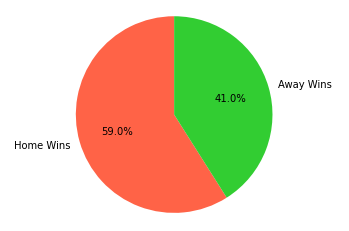

In [17]:
# Pie chart data
labels = ['Home Wins', 'Away Wins']
# sizes = [home_wins, home_losses, away_wins, away_losses]
sizes = [home_wins, away_wins]
# colors = ['#FF6347', '#1E90FF', '#32CD32', '#FFD700']
colors = ['#FF6347', '#32CD32']
# Plot pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Display the pie chart
plt.show()

In [18]:
season_group = final_merged_data.groupby('season_id')
win_rate_per_season = season_group['wl_home'].apply(lambda x: (x == 'W').sum() / x.count())

# index_range = pd.Index(range(22001, 22024))  # 包含22001到22023的范围
# win_rate_per_season = win_rate_per_season.reindex(index_range, fill_value=0)

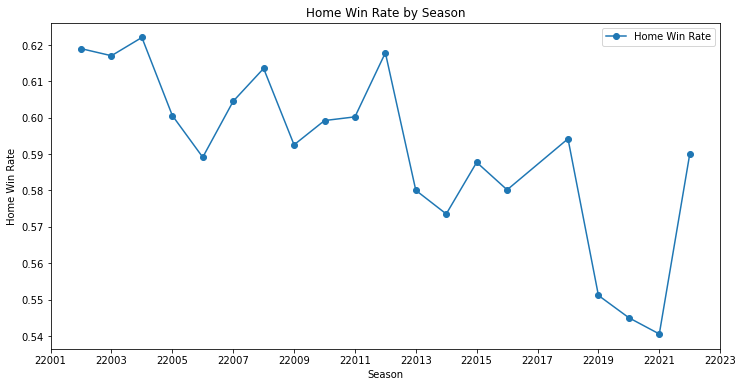

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot a line chart
ax.plot(win_rate_per_season.index, win_rate_per_season, marker='o', linestyle='-', label='Home Win Rate')

# Plot an area chart (uncomment the following line to use an area chart)
# ax.fill_between(win_rate_per_season.index, win_rate_per_season, color='skyblue', alpha=0.5, label='Home Win Rate')

# Customize the chart
ax.set_xlabel('Season')
ax.set_ylabel('Home Win Rate')
ax.set_title('Home Win Rate by Season')
ax.legend()

ax.set_xlim(22001, 22023)
ax.set_xticks(np.arange(22001, 22024, step=2))

# Display the chart
plt.show()

In [20]:
# calculate win # of each team
home_wins = final_merged_data[final_merged_data['wl_home'] == 'W'].groupby('team_id_home')['wl_home'].count().reset_index()
home_wins.columns = ['team_id', 'home_wins']

# calculate home match for each number
home_games = final_merged_data.groupby('team_id_home')['wl_home'].count().reset_index()
home_games.columns = ['team_id', 'home_games']

# home advantege calculated
home_advantage = pd.merge(home_wins, home_games, on='team_id')
home_advantage['home_win_rate'] = home_advantage['home_wins'] / home_advantage['home_games']

# merge 
team_home_advantage = pd.merge(team_df, home_advantage, left_on='id', right_on='team_id')

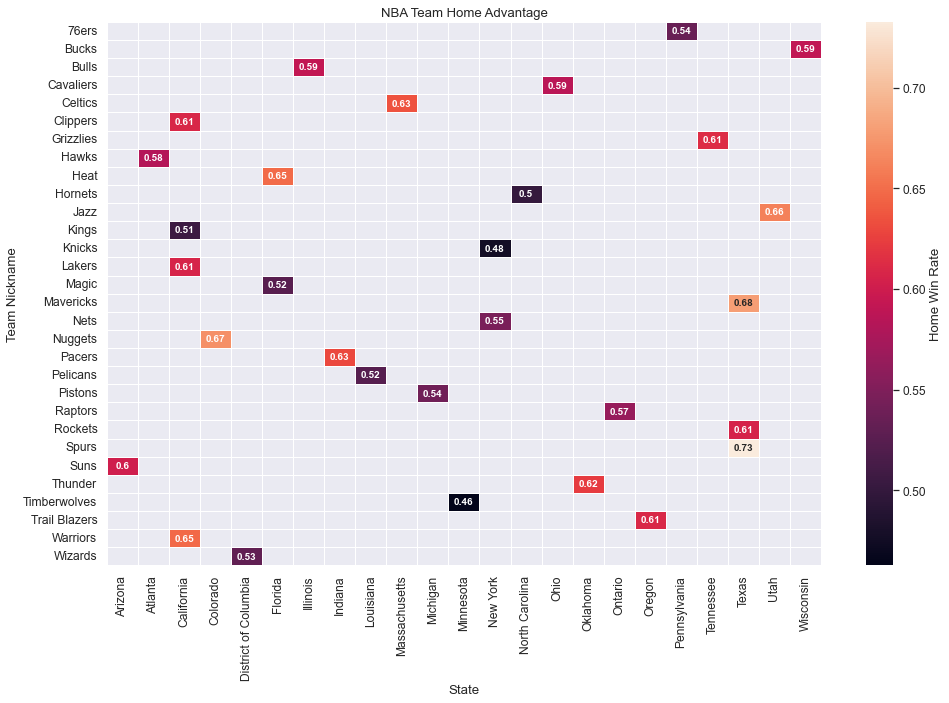

In [21]:
# Prepare the data for the heatmap
team_home_advantage_pivot = team_home_advantage.pivot(
    index="nickname",
    columns="state",
    values="home_win_rate"
)

# Create the heatmap
plt.figure(figsize=(16, 10))
sns.set(font_scale=1.1)  # Adjust font size
heatmap = sns.heatmap(
    team_home_advantage_pivot,
    annot=True,
    linewidths=0.5,
    cbar_kws={"label": "Home Win Rate"},
    annot_kws={"fontsize": 10, "fontweight": "bold"}
)

# Add gridlines
heatmap.set_xticks([x + 0.5 for x in range(len(team_home_advantage_pivot.columns))], minor=True)
heatmap.set_yticks([y + 0.5 for y in range(len(team_home_advantage_pivot.index))], minor=True)
heatmap.xaxis.set_ticks_position('none') 
heatmap.yaxis.set_ticks_position('none') 
heatmap.grid(which='minor', color='black', linewidth=1)

plt.title("NBA Team Home Advantage")
plt.xlabel("State")
plt.ylabel("Team Nickname")
plt.show()

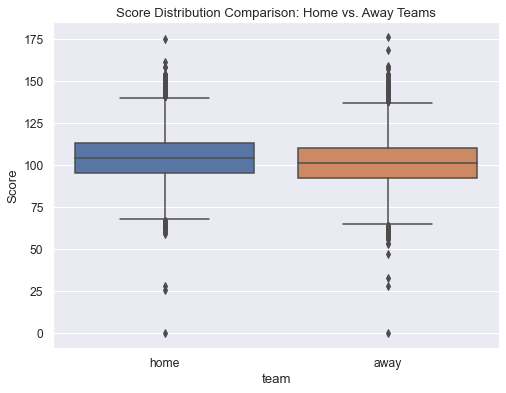

In [22]:
score_data = pd.DataFrame({
    "team": ["home"] * len(final_merged_data) + ["away"] * len(final_merged_data),
    "score": final_merged_data["pts_home"].tolist() + final_merged_data["pts_away"].tolist()
})

plt.figure(figsize=(8, 6))
sns.boxplot(x="team", y="score", data=score_data)
plt.title("Score Distribution Comparison: Home vs. Away Teams")
plt.ylabel("Score")
plt.show()

In [23]:
# # Create a copy of the dataframe to avoid modifying the original dataframe
encoded_data = final_merged_data.copy()

# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the selected columns
encoded_columns = encoder.fit_transform(encoded_data[['timezone']])

# Assign the encoded columns back to the dataframe
encoded_data[['timezone']] = encoded_columns

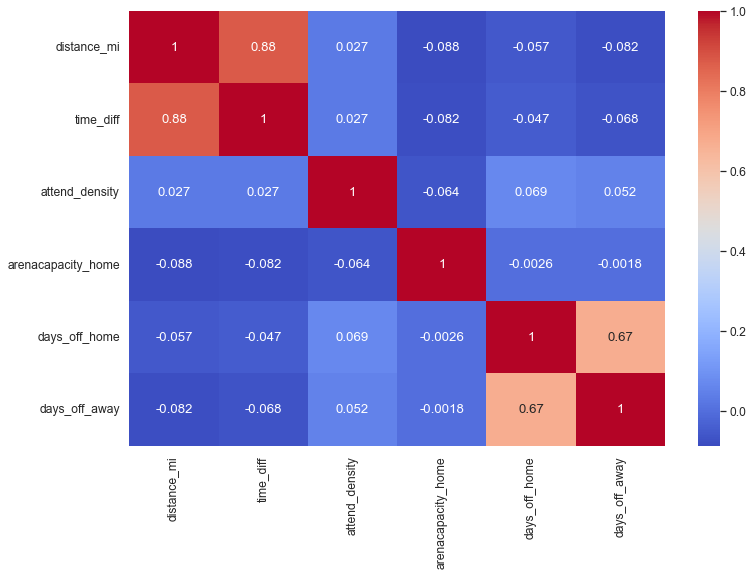

In [24]:
scaler = MinMaxScaler()
columns_to_normalize = ['distance_mi', 'time_diff', 'attend_density', 'arenacapacity_home', 'days_off_home', 'days_off_away']
encoded_data[columns_to_normalize] = scaler.fit_transform(encoded_data[columns_to_normalize])
factors = encoded_data[columns_to_normalize]
correlations = factors.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.show()

Text(0.5, 1.0, 'Home Advantage vs. Attendance date')

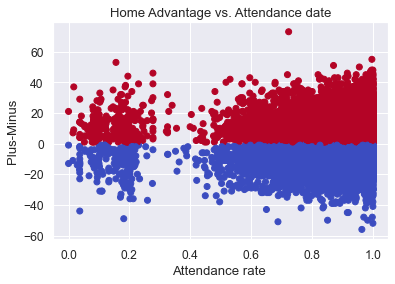

In [25]:
filtered_data = final_merged_data[(final_merged_data['attend_density'] >= 0) & (final_merged_data['attend_density'] <= 1)]
plt.scatter(filtered_data['attend_density'], filtered_data['plus_minus_home'], c=filtered_data['home_advantage'], cmap='coolwarm')

# set axis labels and title
plt.xlabel('Attendance rate ')
plt.ylabel('Plus-Minus')
plt.title('Home Advantage vs. Attendance date')

In [26]:
features = ['arenacapacity_away', 'arenacapacity_home', 'attend_density', 'time_diff', 'distance_mi']

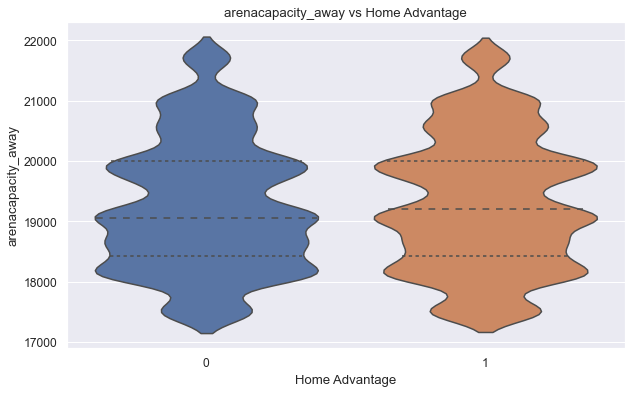

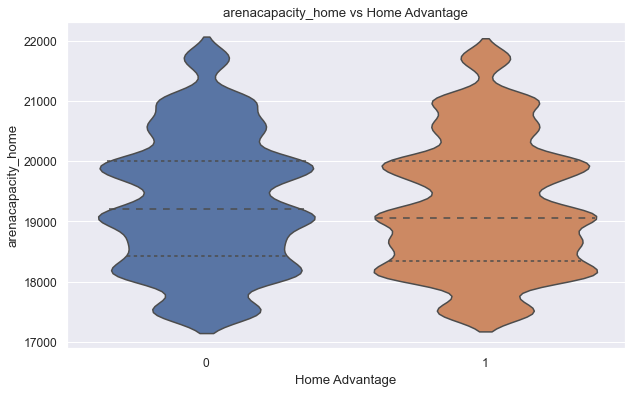

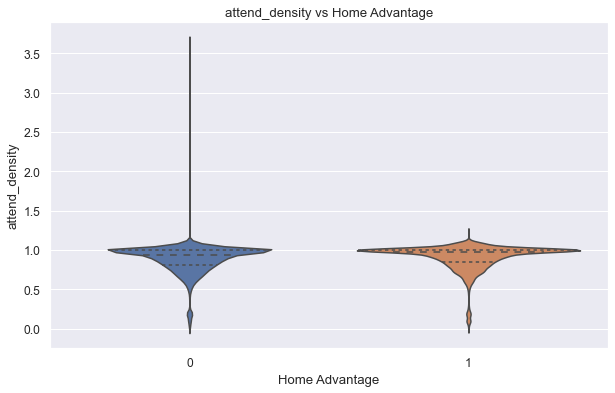

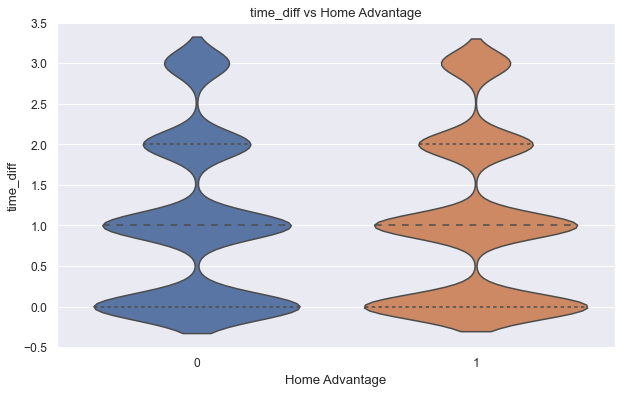

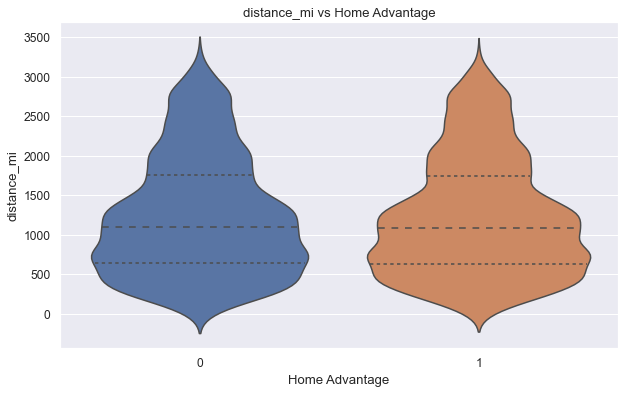

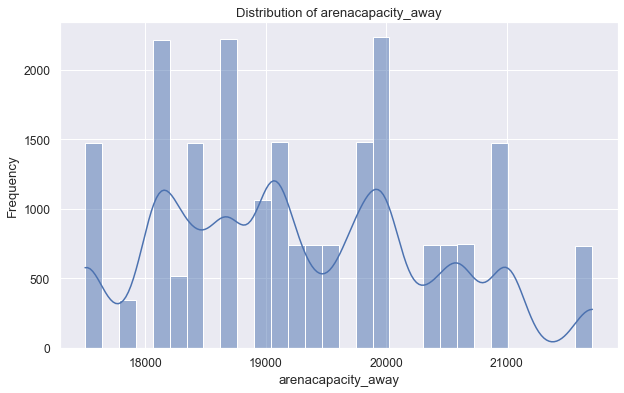

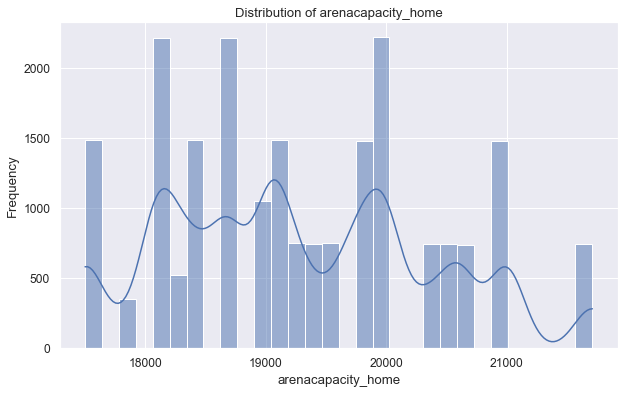

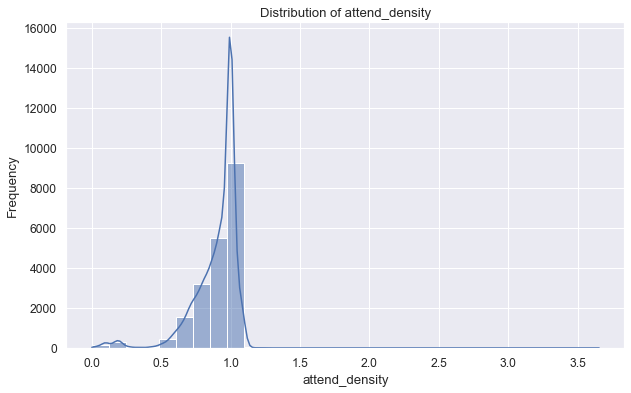

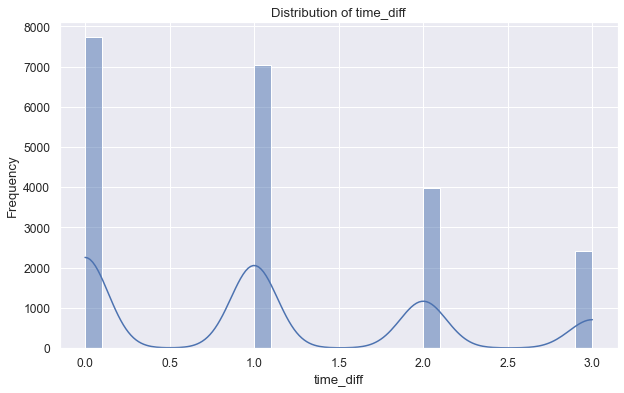

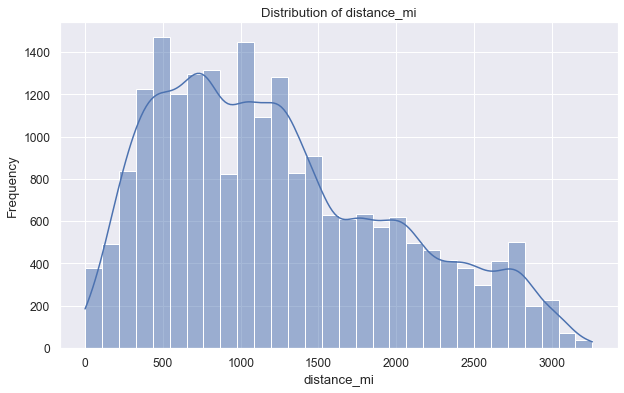

In [27]:
# 创建针对每个特征的箱型图
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='home_advantage', y=feature, data=final_merged_data, inner='quartile')
    plt.title(f'{feature} vs Home Advantage')
    plt.xlabel('Home Advantage')
    plt.ylabel(feature)
    plt.show()

# 创建针对每个特征的直方图
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=final_merged_data, x=feature, kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()